In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import seaborn as sns
import os
import datetime
import json

In [223]:
# import matplotlib import colormaps
from matplotlib.colors import ListedColormap
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker, Sbopen)
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')

In [15]:
url = "https://understat.com/player/8260"
resp = requests.get(url)
# cont = r.json()
# print(cont)
soup = BeautifulSoup(resp.content, 'lxml')

In [40]:
scripts = soup.find_all('script')[3]

In [43]:
strings = scripts.string

In [172]:
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

df = pd.read_json(json_data)

In [107]:
df.dtypes

id                          int64
minute                      int64
result                     object
X                         float64
Y                         float64
xG                        float64
player                     object
h_a                        object
player_id                   int64
situation                  object
season                      int64
shotType                   object
match_id                    int64
h_team                     object
a_team                     object
h_goals                     int64
a_goals                     int64
date               datetime64[ns]
player_assisted            object
lastAction                 object
dtype: object

In [173]:
df_final = df[((df.a_team == 'Manchester City') | (df.h_team == 'Manchester City')) & (df.result == 'Goal')]
#              & (df_final.situation == 'Penalty')]

In [154]:
df_final.situation.unique()

array(['Penalty', 'OpenPlay', 'FromCorner'], dtype=object)

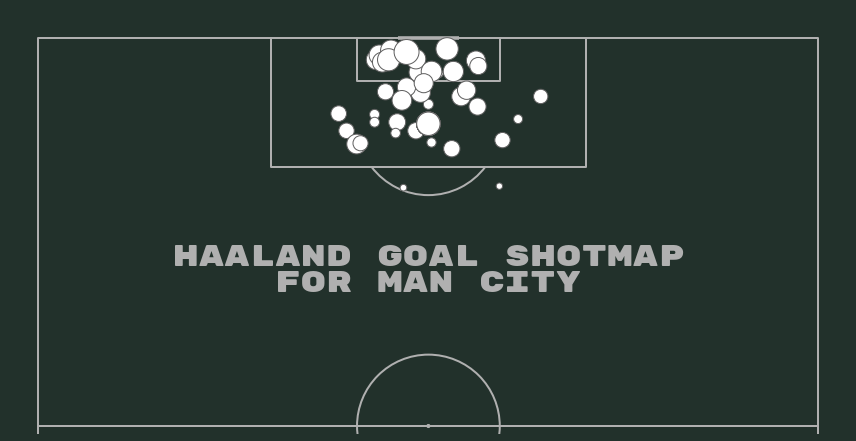

In [239]:
pitch = VerticalPitch(pad_bottom=1,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='line',
                      goal_alpha=0.8,
                     pitch_type = 'custom',
                     pitch_length = 99.5,
                     pitch_width = 100
                     )  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))

fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

sc = pitch.scatter(df_final.X*100, df_final.Y*100,
                   # size varies between 100 and 1000 (points squared)
                   s= df_final.xG*720,
                   c='white',  # color for scatter in hex format
                   edgecolors='#606060',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html,
#                    hatch = '///',
                   marker='o',
                   ax=ax)
txt = ax.text(x = 50, y = 70, s='Haaland Goal ShotMap\nfor Man City',
              size= 30,
              # here i am using a downloaded font from google fonts instead of passing a fontdict
              fontproperties=fm_rubik.prop, color=pitch.line_color,
              va='center', ha='center')

In [181]:
pip install statsbombpy

Note: you may need to restart the kernel to use updated packages.


In [182]:
from statsbombpy import sb

In [188]:
comp = sb.competitions()

In [192]:
comp.competition_name.unique()

array(['1. Bundesliga', 'Champions League', 'Copa del Rey',
       "FA Women's Super League", 'FIFA U20 World Cup', 'FIFA World Cup',
       'Indian Super league', 'La Liga', 'Liga Profesional', 'Ligue 1',
       'North American League', 'NWSL', 'Premier League', 'Serie A',
       'UEFA Euro', 'UEFA Europa League', "UEFA Women's Euro",
       "Women's World Cup"], dtype=object)

In [194]:
comp[(comp.competition_name == "FA Women's Super League") & (comp.season_id == 90)]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
22,37,90,England,FA Women's Super League,female,False,False,2020/2021,2023-02-25T14:52:09.326729,2021-06-13T16:17:31.694,None,2023-02-25T14:52:09.326729


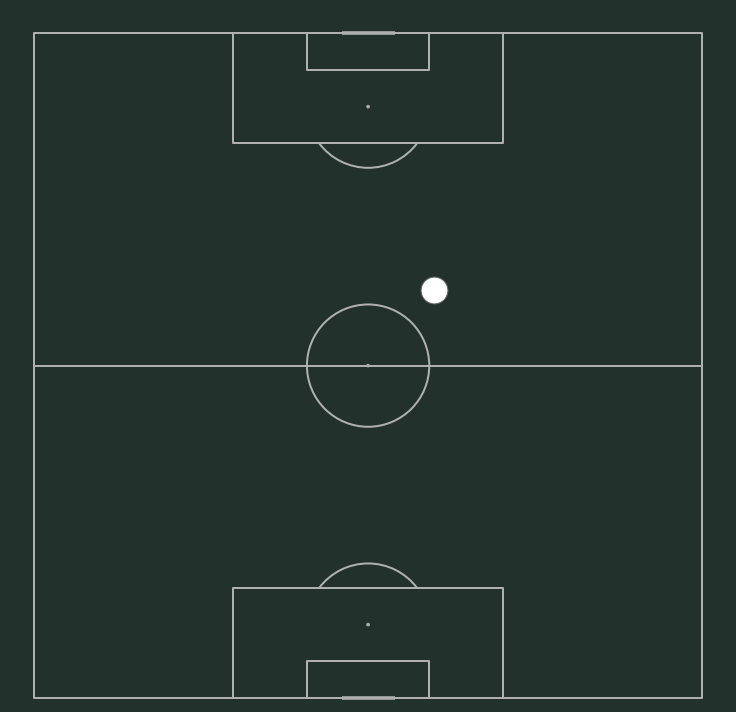

In [221]:
pitch = VerticalPitch(pad_bottom=1,  # pitch extends slightly below halfway line
                      half=False,  # half of a pitch
                      goal_type='line',
                      goal_alpha=0.8,
                     pitch_type = 'custom',
                     pitch_length = 99.5,
                     pitch_width = 100
                     )  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))

fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

sc = pitch.scatter(61.0, 40.1,
                   # size varies between 100 and 1000 (points squared)
                   s= 720,
                   c='white',  # color for scatter in hex format
                   edgecolors='#606060',  # give the markers a charcoal border
                   # for other markers types see: https://matplotlib.org/api/markers_api.html,
#                    hatch = '///',
                   marker='o',
                   ax=ax)